<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Tarea_4_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Redes Neuronales
Nombre: Hugo Cuautle Magos

Matricula: 201847053

Materia: Análisis de datos

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop

import joblib  

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Problema 1

Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo $[-1,1]$. Graficar la solución de la red en conjunto con la gráfica de la función. 

1.  $3 sin(\pi x)$
2.  $1+2x+4x^3$

In [2]:
#def seno(x): 
#  return 3.0*np.sin(np.pi*x)

#def poli(x):
#  return 1.0 + 2.0*x + 4.0*x*x*x

#x=np.linspace(-1,1,100)
#y_sen=seno(x)
#y_poli=poli(x)

In [3]:
#model_s=Sequential()
#model_s.add(Dense(800,activation='sigmoid',input_shape=(1,)))
#model_s.add(Dense(300,activation='elu',input_shape=(1,)))
#model_s.add(Dense(1,activation='linear'))

#model_p=Sequential()
#model_p.add(Dense(800,activation='sigmoid',input_shape=(1,)))
#model_p.add(Dense(300,activation='elu',input_shape=(1,)))
#model_p.add(Dense(1,activation='linear'))

In [4]:
#model_s.compile(optimizer='RMSprop',
#              loss = 'mean_squared_error')

#historial=model_s.fit(x, y_sen,epochs=1000,verbose=False)

In [5]:
#model_p.compile(optimizer='RMSprop',
#              loss = 'mean_squared_error')

#historial=model_p.fit(x, y_poli,epochs=1000,verbose=False)

In [6]:
#y_pred_sen=model_s.predict([x])
#y_pred_poli=model_p.predict([x])

In [7]:
#plt.title(r'Grafica de $3\sin(\pi x)$')
#plt.plot(x,y_sen)
#plt.plot(x,y_pred_sen)
#plt.legend(['Grafica real','Grafica de prediccion'])

#plt.show()
#plt.title(r'Grafica de $1+2x+4x^3$')
#plt.plot(x,y_poli)
#plt.plot(x,y_pred_poli)
#plt.legend(['Grafica real','Grafica de prediccion'])

#del model_p
#del model_s

## Problema 2

Elegir un problema de los siguientes: 

- Detectar fraudes en movimientos de tarjetas bancarias. https://www.kaggle.com/mlg-ulb/creditcardfraud

- Identificar enfermedades en plantas. 

y diseñar y entrenar una red neuronal con keras

In [8]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c plant-pathology-2021-fgvc8 --force

100% 14.9G/14.9G [02:45<00:00, 65.3MB/s]
100% 14.9G/14.9G [02:45<00:00, 96.2MB/s]


In [9]:
!mkdir plant
!unzip plant-pathology-2021-fgvc8.zip -d plant

!rm plant-pathology-2021-fgvc8.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: plant/train_images/e00c97b2de4749ce.jpg  
  inflating: plant/train_images/e00df890cfe62736.jpg  
  inflating: plant/train_images/e00ed0bf43a87f25.jpg  
  inflating: plant/train_images/e00f759d65d52887.jpg  
  inflating: plant/train_images/e00f934d9e50ad5b.jpg  
  inflating: plant/train_images/e00fce341cb63da5.jpg  
  inflating: plant/train_images/e010c7c35ecf3d1c.jpg  
  inflating: plant/train_images/e01112939f783fec.jpg  
  inflating: plant/train_images/e01592da4d71b8be.jpg  
  inflating: plant/train_images/e0189acaf8cf80fd.jpg  
  inflating: plant/train_images/e0189e4999bdd0fa.jpg  
  inflating: plant/train_images/e01ae16d4a759cb5.jpg  
  inflating: plant/train_images/e01dc39ccb2b4ccb.jpg  
  inflating: plant/train_images/e01e42d90c66f3f3.jpg  
  inflating: plant/train_images/e01e870bec65f40f.jpg  
  inflating: plant/train_images/e01f17e0187fb80f.jpg  
  inflating: plant/train_images/e01f503cb752e6c5.jpg 

In [10]:
l='/content/plant/train.csv'
df=pd.read_csv(l)

In [11]:
enfermedad=[]
for i in df['labels']:
  if i not in enfermedad:
    enfermedad.append(i)

print(enfermedad)

['healthy', 'scab frog_eye_leaf_spot complex', 'scab', 'complex', 'rust', 'frog_eye_leaf_spot', 'powdery_mildew', 'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot complex', 'rust frog_eye_leaf_spot', 'powdery_mildew complex', 'rust complex']


In [12]:
!rm -r /content/plant/test_images 
!mkdir /content/plant/test_images

In [13]:
from os import mkdir

s1='/content/plant/train_images/'
s2='/content/plant/test_images/'

for i in enfermedad: 
  mkdir(s1+i)
  mkdir(s2+i)

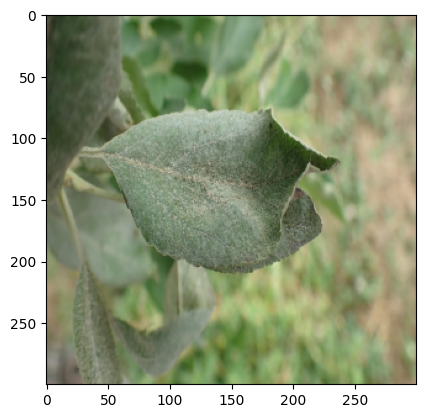

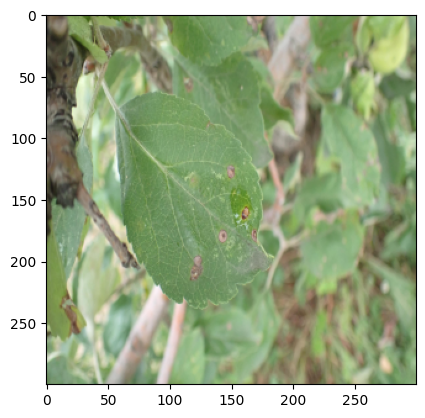

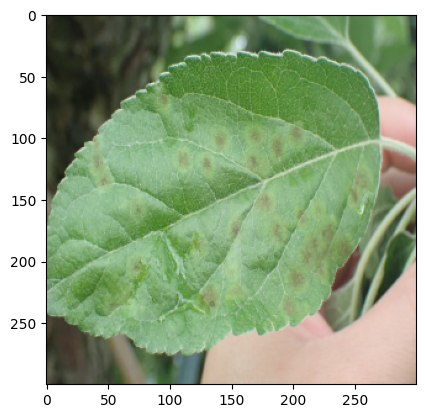

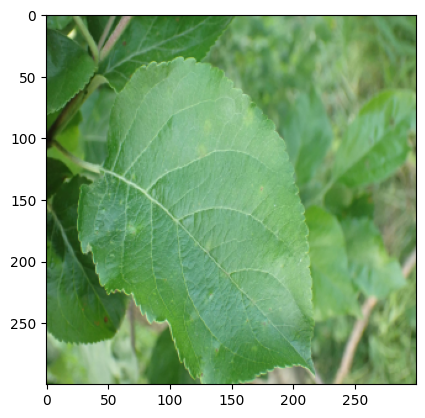

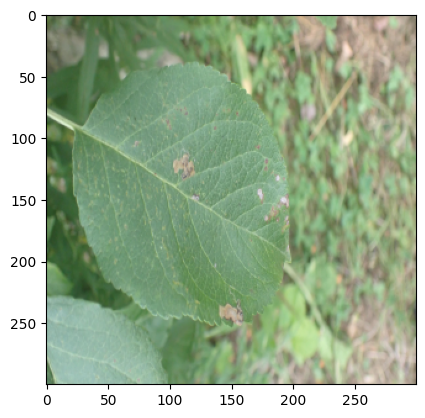

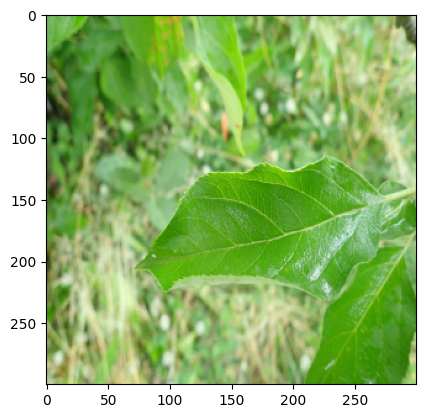

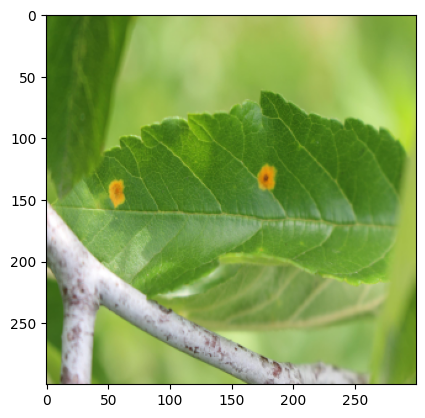

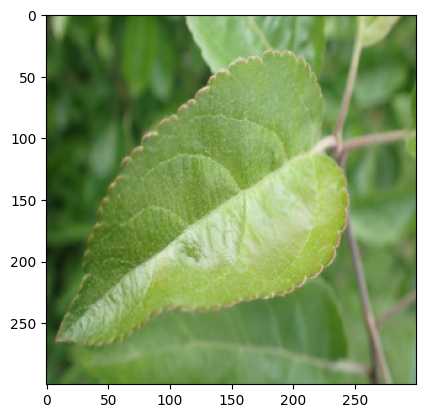

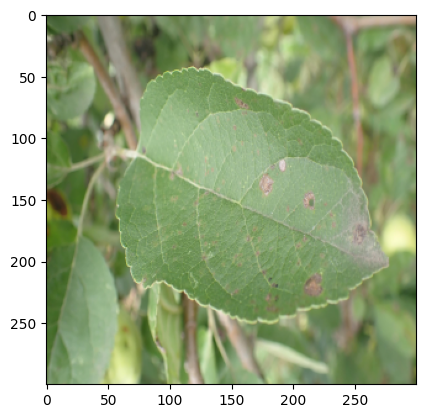

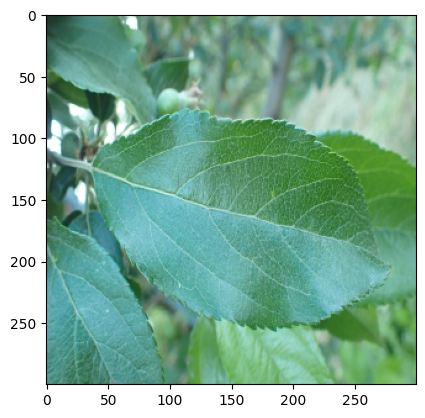

In [14]:
w = 300
h = 300

for i in range(10):
  imageToMatrice=imread('/content/plant/train_images/'+df['image'][i])
  imageToMatrice=cv2.resize((imageToMatrice),(w,h),interpolation=cv2.INTER_AREA)
  plt.imshow(imageToMatrice)
  plt.show()

In [15]:
import shutil

def mover_img (s,j,k):
  for i in df['image'][j:k]:
    old_file = '/content/plant/train_images/'+i
    destination = s+df['labels'][j]
    j=j+1
    shutil.move(old_file, destination)

mover_img(s1,0,15000)
mover_img(s2,15000,18632)

In [16]:
input_shape = (h,w,3)

train_dir = '/content/plant/train_images'
test_dir = '/content/plant/test_images'

num_clases = 12
epochs = 2

batch_size=100
num_train=15000
num_test=3632

epoch_steps = num_train // batch_size
test_steps = num_test // batch_size

In [17]:
gentrain = ImageDataGenerator(rescale=1. /255.)

train = gentrain.flow_from_directory(train_dir,
                                     batch_size=batch_size,
                                     target_size=(w,h),
                                     class_mode='categorical')

gentest = ImageDataGenerator(rescale=1. /255.)

test = gentest.flow_from_directory(test_dir,
                                    batch_size=batch_size,
                                    target_size=(w,h),
                                    class_mode='categorical')

Found 15000 images belonging to 12 classes.
Found 3632 images belonging to 12 classes.


In [18]:
#model = Sequential()
#model.add(Conv2D(10,(4,4),input_shape=(h,w,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(10,(4,4)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(20,(4,4)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(Dense(12))
#model.add(Activation('softmax'))

#model.summary()

In [19]:
model = tf.keras.models.load_model('/content/drive/MyDrive/modelo_actualizado.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.fit_generator(train,
                    steps_per_epoch=epoch_steps,
                    epochs=epochs,
                    validation_data=test,
                    validation_steps=test_steps,
                    )

model.save('modelo_actualizado.h5')
!cp modelo_actualizado.h5  /content/drive/MyDrive/

<ipython-input-20-1f00e64ebd65>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,


Epoch 1/2
150/150 [==============================] - 4517s 30s/step - loss: 0.2177 - accuracy: 0.3747 - val_loss: 0.2236 - val_accuracy: 0.4017
Epoch 2/2
150/150 [==============================] - 4510s 30s/step - loss: 0.2054 - accuracy: 0.4313 - val_loss: 0.2076 - val_accuracy: 0.4358
